# Disease Progression Machine Learning

### Linear Models
#### October 3, 2025 at 11:59PM


#### Name: Brianna Capuano
#### Email: bmc9842@nyu.edu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Z Disease Dataset

The Z dataset contains ten baseline variables (age, sex, BMI, average blood pressure, and six blood serum measurements) and a quantitative measure of disease progression one year after baseline. Specifically, it comprises a total of 442 samples, where each sample has 10 input features and a target value representing the quantitative measure of disease Z progression.

In [ ]:
# Load the entire dataset from the CSV file
from google.colab import drive
drive.mount('/content/drive/')
hw_data = os.getcwd() + '/drive/My Drive/Fundamentals of Machine Learning/hw1_dataset.csv' #my path
data = pd.read_csv(hw_data)

# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values
feature_names = X.columns.tolist()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


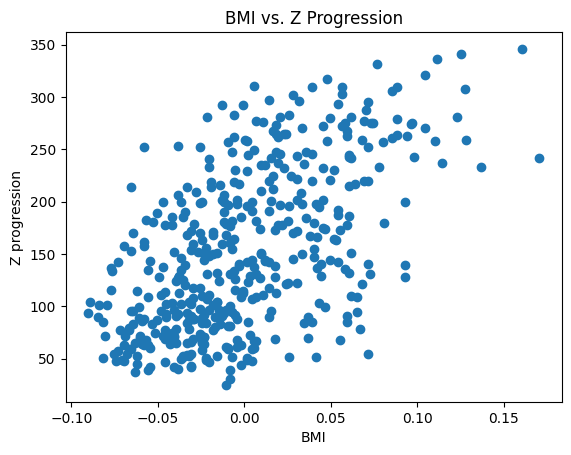

In [ ]:
x=data["bmi"]
y=data['target']

plt.scatter(x,y)
plt.xlabel("BMI")
plt.ylabel("Z progression")
plt.title("BMI vs. Z Progression")
plt.show()

There appears to be a positive correlation becuase as bmi increases, the target variable also increases. In other words, there is a positive slope trendline between x and y.

We cannot confidently infer a person's disease status by using only BMI. This is because there are many other contributing factors that effect disease status that we would be ignoring. There isn't enough information from just 1 input variable we would not be able to correctly predict Z.

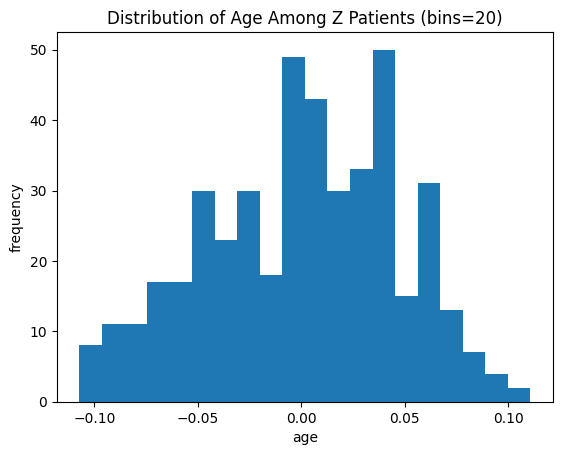

In [ ]:
x=data['age']

plt.hist(x,bins=20)
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("Distribution of Age Among Z Patients (bins=20)")
plt.show()

Bin 14 has the highest frequency with 50 count (the most common age value being .045).

This histogram most resembles a bimodal distribution.

/tmp/ipython-input-3301676929.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mal,fem],labels=['male','female'])


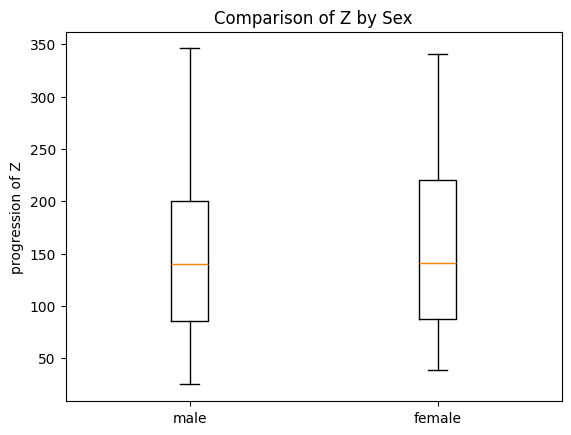

Male (25th, 50th, 75th): [ 85.5 140.  200. ]
Female (25th, 50th, 75th): [ 88.  141.  220.5]


In [ ]:
fem = data['target'][data['sex']>0]
mal = data['target'][data['sex']<0]

plt.boxplot([mal,fem],labels=['male','female'])
plt.ylabel('progression of Z')
plt.title('Comparison of Z by Sex')
plt.show()

male_percs = np.percentile(mal, [25, 50, 75])
female_percs = np.percentile(fem, [25, 50, 75])

print("Male (25th, 50th, 75th):", male_percs)
print("Female (25th, 50th, 75th):", female_percs)



1. The box plot shows that progression does not differ a lot between the male and female sex.
2. The percentiles for each sex are very similar, almost the same.

### Linear, Ridge, and Lasso Regression

Split the dataset into training and testing sets (80/20\%) split.

In [ ]:
data_shuff = data.sample(frac=1, random_state=42).reset_index(drop=True)

split_loc = int(0.8 * len(data_shuff))

train = data_shuff.iloc[:split_loc]
test  = data_shuff.iloc[split_loc:]


X_train = data_shuff[['age', 'bmi','sex','bp','s1','s2','s3','s4','s5','s6']].iloc[:split_loc].values
y_train = data_shuff['target'].iloc[:split_loc].values


X_test = data_shuff[['age', 'bmi','sex','bp','s1','s2','s3','s4','s5','s6']].iloc[split_loc:].values
y_test = data_shuff['target'].iloc[split_loc:].values

Linear regression

A linear regression model is a linear function of the parameters of the model. Its output $y$ is a real number or a real vector, depending on the task definition. That is:
$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2$$


* $X_i = [X_1^{(1)}\ldots X_i^{(p)}]$
* $\beta_0,\ldots,\beta_p$ are the coefficients for the features.
* $x_{ji}$ represents the values of the j-th feature for the i-th observation.
* $y_i$ is the target value for the i-th observation.

In [ ]:
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias  = np.c_[np.ones(X_test.shape[0]), X_test]

w = np.linalg.inv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train)

intercept = w[0]
linear_coeffs = w[1:]

y_pred = X_test_bias @ w

mse = np.mean((y_test - y_pred) ** 2)

print("Intercept:", intercept)
print("Coefficients:", linear_coeffs)
print("MSE on test set:", mse)

Intercept: 154.05648499799608
Coefficients: [    5.1457391    501.04933715  -236.29690305   275.3726513
 -1017.37063454   638.84958236   185.9452404    207.02960792
   880.18951581    82.88971292]
MSE on test set: 3368.0413766713446


Ridge Regression is a regularized linear regression with an added L2 regularization term to the linear regression cost function. This regularization is useful because there could be instability in training (e.g., there could be many correlated features). At a high level, the L2 regularization tries to spread the influence more evenly across the features.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda \|\beta\|^2_2$$

* $\lambda$ is the regularization hyper-parameter.


In [ ]:
def ridge_regression(X_train, y_train, X_test, y_test, lam=1.0):

    X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test_b  = np.c_[np.ones((X_test.shape[0], 1)), X_test]

    n_features = X_train_b.shape[1]
    I = np.eye(n_features)
    I[0, 0] = 0

    beta = np.linalg.inv(X_train_b.T @ X_train_b + lam * I) @ X_train_b.T @ y_train

    intercept = beta[0]
    ridge_coeffs = beta[1:]

    y_pred = X_test_b @ beta

    mse_ridge = np.mean((y_test - y_pred) ** 2)

    return intercept, ridge_coeffs, mse

intercept, ridge_coeffs, mse_ridge = ridge_regression(X_train, y_train, X_test, y_test, lam=1.0)
print("Intercept:", intercept)
print("Coefficients:", ridge_coeffs)
print("MSE:", mse_ridge)


Intercept: 154.25167072181128
Coefficients: [  38.88090835  277.96113843  -68.33163126  167.46046629    3.61635445
  -27.89292367 -154.87744373  121.49180308  257.18646954  116.73199518]
MSE: 3368.0413766713446


LASSO Regression is a regularized linear regression with an added L1 regularization term to the linear regression cost function.
The idea behind LASSO is to enforce sparsity, where the model uses a small number of input features for prediction. The intuition is, if there are a large number of input features that might lead to the model overfitting (i.e., memorizing the data), then we may want to shrink some of the coefficients toward 0, meaning the model would effectively not use that subset of features for prediction.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda |\beta|$$

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

lasso_intercept = lasso.intercept_
lasso_coeffs = lasso.coef_

y_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)

print("Lasso Intercept:", lasso_intercept)
print("Lasso Coefficients:", lasso_coeffs)
print("MSE:", lasso_mse)



Lasso Intercept: 154.11405555682725
Lasso Coefficients: [   0.          502.04859201 -155.53255355  226.00316369  -75.73111733
   -0.         -227.03855735    0.          536.91603525   58.77852692]
MSE: 3324.94831541998


###Model Analysis

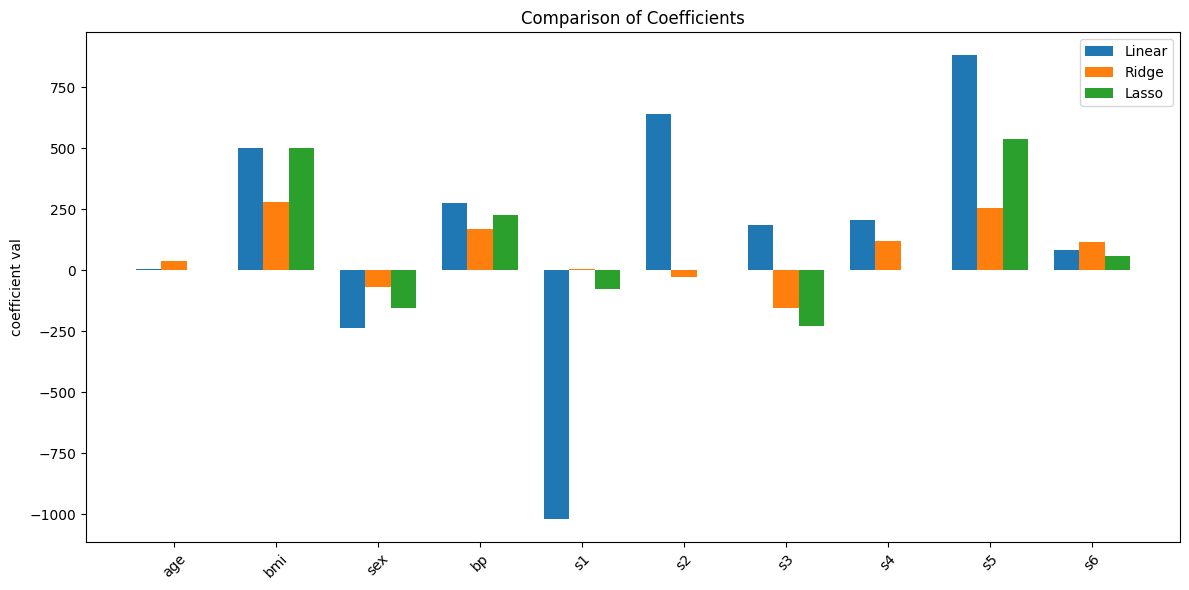

In [ ]:


feature_names = ['age', 'bmi','sex','bp','s1','s2','s3','s4','s5','s6']
x = np.arange(len(feature_names))
width = 0.25
plt.figure(figsize=(12,6))

plt.bar(x - width, linear_coeffs, width, label="Linear")
plt.bar(x, ridge_coeffs, width, label="Ridge")
plt.bar(x + width, lasso_coeffs, width, label="Lasso")

plt.xticks(x, feature_names, rotation=45)
plt.ylabel("coefficient val")
plt.title("Comparison of Coefficients")
plt.legend()
plt.tight_layout()
plt.show()

Cross-validation involves dividing the available data into multiple subsets or folds to ensure that the model is evaluated on different parts of the data. This helps in obtaining a more accurate estimate of how the model would perform on unseen data.

By cross validation, let us use k-fold cross validation, where $k=5$ (a typically used number), let us use 80% as training set and 20% as validation set.

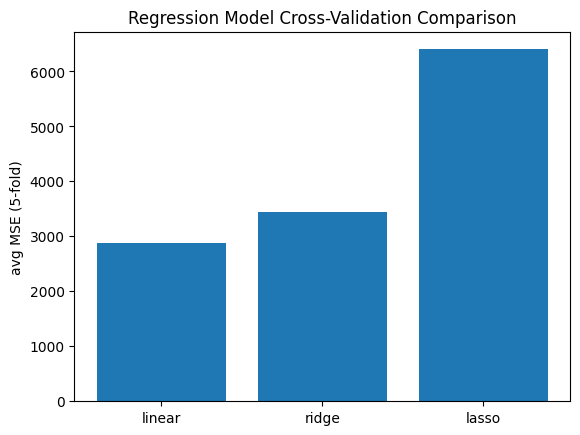

In [ ]:

from sklearn.model_selection import train_test_split

def fit_linear(X, y):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    w = np.linalg.pinv(X_bias.T @ X_bias) @ (X_bias.T @ y)
    return w

def predict_linear(X, w):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    return X_bias @ w

def fit_ridge(X, y, alpha=1.0):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    n_features = X_bias.shape[1]
    I = np.eye(n_features)
    I[0,0] = 0
    w = np.linalg.pinv(X_bias.T @ X_bias + alpha * I) @ (X_bias.T @ y)
    return w

def fit_lasso(X, y, alpha=0.01, lr=0.001, n_iter=1000):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    n_samples, n_features = X_bias.shape
    w = np.zeros(n_features)

    for _ in range(n_iter):
        y_pred = X_bias @ w
        grad = (2/n_samples) * X_bias.T @ (y_pred - y)
        w = w - lr * grad
        w[1:] = np.sign(w[1:]) * np.maximum(np.abs(w[1:]) - lr*alpha, 0)
    return w

def predict_lasso(X, w):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    return X_bias @ w

def k_fold_cv(X, y, k=5, model="linear", alpha=1.0):
    n = len(X)
    fold_size = n // k
    indices = np.arange(n)
    np.random.shuffle(indices)

    mse_scores = []

    for i in range(k):
        val_idx = indices[i*fold_size:(i+1)*fold_size]
        train_idx = np.setdiff1d(indices, val_idx)

        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val     = X[val_idx], y[val_idx]

        if model == "linear":
            w = fit_linear(X_train, y_train)
            y_pred = predict_linear(X_val, w)
        elif model == "ridge":
            w = fit_ridge(X_train, y_train, alpha=alpha)
            y_pred = predict_linear(X_val, w)
        elif model == "lasso":
            w = fit_lasso(X_train, y_train, alpha=alpha)
            y_pred = predict_lasso(X_val, w)

        mse = np.mean((y_val - y_pred) ** 2)
        mse_scores.append(mse)

    return np.mean(mse_scores)

linear_mse = k_fold_cv(X_train, y_train, k=5, model="linear")
ridge_mse  = k_fold_cv(X_train, y_train, k=5, model="ridge", alpha=1.0)
lasso_mse  = k_fold_cv(X_train, y_train, k=5, model="lasso", alpha=0.01)

models = ["linear", "ridge", "lasso"]
mses = [linear_mse, ridge_mse, lasso_mse]

plt.bar(models, mses)
plt.ylabel("avg MSE (5-fold)")
plt.title("Regression Model Cross-Validation Comparison")
plt.show()


ridge best alpha: 0.1 MSE: 2941.4644637448464
lasso best alpha: 10 MSE: 6363.679853072697


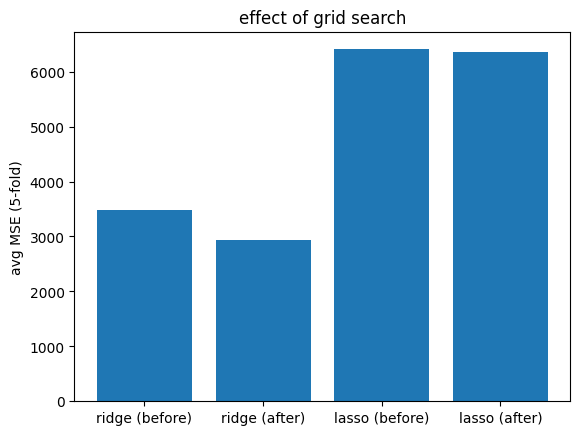

In [ ]:
def grid_search(X, y, model, alpha_values):
    best_alpha = None
    best_score = float("inf")
    scores = {}

    for alpha in alpha_values:
        mse = k_fold_cv(X, y, k=5, model=model, alpha=alpha)
        scores[alpha] = mse
        if mse < best_score:
            best_score = mse
            best_alpha = alpha

    return best_alpha, best_score, scores

ridge_before = k_fold_cv(X_train, y_train, model="ridge", alpha=1.0)
lasso_before = k_fold_cv(X_train, y_train, model="lasso", alpha=0.01)

alpha_candidates = [0.001, 0.01, 0.1, 1, 10, 100]

best_alpha_ridge, ridge_after, ridge_scores = grid_search(X_train, y_train, "ridge", alpha_candidates)
best_alpha_lasso, lasso_after, lasso_scores = grid_search(X_train, y_train, "lasso", alpha_candidates)

print("ridge best alpha:", best_alpha_ridge, "MSE:", ridge_after)
print("lasso best alpha:", best_alpha_lasso, "MSE:", lasso_after)

models = ["ridge (before)", "ridge (after)", "lasso (before)", "lasso (after)"]
mses = [ridge_before, ridge_after, lasso_before, lasso_after]

plt.bar(models, mses)
plt.ylabel("avg MSE (5-fold)")
plt.title("effect of grid search")
plt.show()

1. The grid search found the best regularization strength (alpha) for both ridge and lasso from the values. These new values balance bias and variance the best. For ridge, the best alpha is 0.001, and for lasso, the best alpha is 0.1.
2. The grid search did improve model performance, as you can see that both models have lower MSEs after tuning than their initial alpha values.

### Bias and Variance Tradeoff


The tradeoff is essentially that there is a balance between two sources of
prediction error in a model (tradeoff between underfitting and overfitting).

As model complexity increases bias decreases, but variance increases.  A good model finds the bias/variance balance and minimizes the error.

Consider the Z dataset with input features X and target values y. Introduce polynomial features with degrees 5 to transform the input features into higher-degree polynomials.

To demonstrate the bias-variance tradeoff, I fit the 3 types of regression models to the transformed dataset. Then, I created line plots where the x-axis represents the polynomial degrees, and the y-axis represents the Mean Squared Error (MSE) for both the training and testing datasets. I compared the errors between these models.


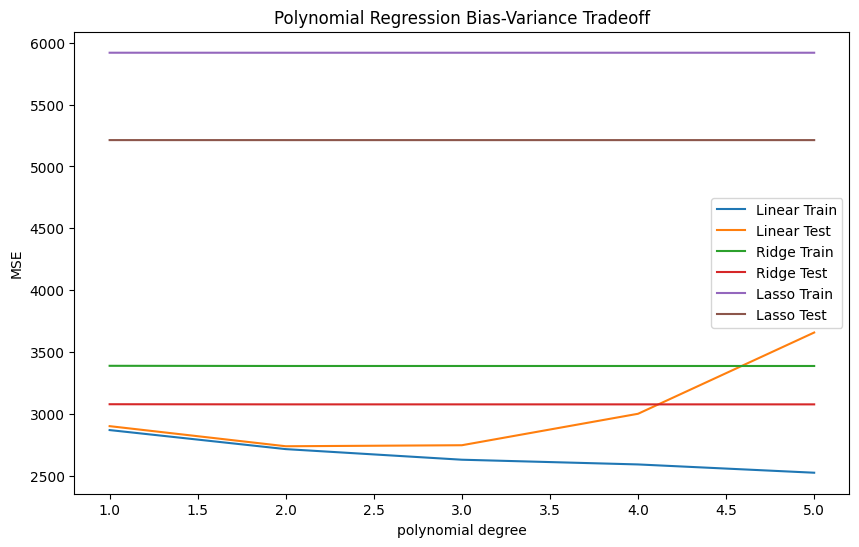

In [ ]:
def polynomial_features(X, degree):
    if isinstance(X, pd.DataFrame):
        X = X.values
    n_samples, n_features = X.shape
    poly = [np.ones(n_samples)]
    for d in range(1, degree+1):
        for i in range(n_features):
            poly.append(X[:, i]**d)
    return np.vstack(poly).T

def fit_linear(X, y):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    w = np.linalg.pinv(X_bias.T @ X_bias) @ (X_bias.T @ y)
    return w

def predict(X, w):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    return X_bias @ w

def fit_ridge(X, y, alpha=1.0):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    n_features = X_bias.shape[1]
    I = np.eye(n_features)
    I[0,0] = 0
    w = np.linalg.pinv(X_bias.T @ X_bias + alpha*I) @ (X_bias.T @ y)
    return w

def fit_lasso(X, y, alpha=0.01, lr=0.001, n_iter=2000):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    n_samples, n_features = X_bias.shape
    w = np.zeros(n_features)
    for _ in range(n_iter):
        y_pred = X_bias @ w
        grad = (2/n_samples) * X_bias.T @ (y_pred - y)
        w = w - lr * grad
        w[1:] = np.sign(w[1:]) * np.maximum(np.abs(w[1:]) - lr*alpha, 0)
    return w

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(1, 6)
train_errors = {"Linear": [], "Ridge": [], "Lasso": []}
test_errors  = {"Linear": [], "Ridge": [], "Lasso": []}

for d in degrees:
    X_train_poly = polynomial_features(X_train, d)
    X_test_poly  = polynomial_features(X_test, d)

    w_lin = fit_linear(X_train_poly, y_train)
    y_train_pred = predict(X_train_poly, w_lin)
    y_test_pred  = predict(X_test_poly, w_lin)
    train_errors["Linear"].append(np.mean((y_train - y_train_pred)**2))
    test_errors["Linear"].append(np.mean((y_test - y_test_pred)**2))

    w_ridge = fit_ridge(X_train_poly, y_train, alpha=1.0)
    y_train_pred = predict(X_train_poly, w_ridge)
    y_test_pred  = predict(X_test_poly, w_ridge)
    train_errors["Ridge"].append(np.mean((y_train - y_train_pred)**2))
    test_errors["Ridge"].append(np.mean((y_test - y_test_pred)**2))

    w_lasso = fit_lasso(X_train_poly, y_train, alpha=0.01)
    y_train_pred = predict(X_train_poly, w_lasso)
    y_test_pred  = predict(X_test_poly, w_lasso)
    train_errors["Lasso"].append(np.mean((y_train - y_train_pred)**2))
    test_errors["Lasso"].append(np.mean((y_test - y_test_pred)**2))

plt.figure(figsize=(10,6))
for model in train_errors:
    plt.plot(degrees, train_errors[model],label=f"{model} Train")
    plt.plot(degrees, test_errors[model], label=f"{model} Test")

plt.xlabel("polynomial degree")
plt.ylabel("MSE")
plt.title("Polynomial Regression Bias-Variance Tradeoff")
plt.legend()
plt.show()

#### Z dataset (Classification)

We will create a classification version of the Z dataset as follows:

Class 0: Denotes Z progression values that fall below the 50th percentile of the original target variable.

Class 1: Denotes Z progression values that surpass the 50th percentile of the original target variable.

In [ ]:
from sklearn.utils import shuffle

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Create the target variable
y = np.where(y > np.percentile(y, 50), 1, 0)

### Logistic Regression


Implement the sigmoid function.    
Initialize the weights and biases to zeros and implement gradient descent.   
Implement the predict and predict_proba functions:
  - predict returns a single discrete category corresponding to the class that has been predicted.
  - predict_proba returns continuous values that represent the likelihood of each input belonging to each class.

In [ ]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        y_predicted_proba = self.predict_proba(X)
        y_predicted = np.where(y_predicted_proba > 0.5, 1, 0)
        return y_predicted

I created an instance of a LogisticRegressionScratch model and train it using a new (80/20%) split of the classification dataset. Afterwards, I calculated the accuracy, precision, recall, and F1 score.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegressionScratch(lr=0.01, n_iter=1000)

model.fit(X_train_clf, y_train_clf)

y_pred_clf = model.predict(X_test_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)
print("f1 score", f1)

accuracy 0.5955056179775281
precision 0.5416666666666666
recall 0.9285714285714286
f1 score 0.6842105263157895
